In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import plot_utils as p
root = R'~\Github\WhenMutationsDontMatter\PTEN\Step_3_trans_effect\csv'

In [2]:
all_df = pd.read_csv(root+R'\all_heatmap.csv')
#all_df = pd.read_csv(root+R'\sig_pval_heatmap.csv')

In [10]:
sig_only = all_df.loc[all_df['P_Value'] < 0.05]
vc = sig_only.Cancer.value_counts()
df = vc.to_frame()
df = df.reset_index()
df = df.rename(columns = {'index': 'Cancer','Cancer':'Sig_One'})
df

,Cancer,Sig_One
0,Gbm,1900
1,Hnscc,570
2,En,415
3,Luad,111
4,Lscc,3
5,Ov,1


# Get a list of significant genes in at least one cancer

In [4]:
# Uses corrected pvals from wrap_ttest, each cancer's cutoff is 0.05
sig_one_cancer = {}
sig_one_count = {}
for cancer in df.Cancer:
    c_df = sig_only.loc[sig_only['Cancer'] == cancer]
    c_prot_list = list(c_df.Proteomics)
    sig_one_cancer[cancer] = c_prot_list 
    sig_one_count[cancer] = len(c_prot_list)
    #print(cancer, len(c_prot_list), '\n')
#print('No sig for Brca and Colon') 

sig_one_count_df = pd.DataFrame.from_dict(sig_one_count, orient = 'index')
sig_one_count_df
ns = {'Colon': 0, 'Brca': 0}
ns_df = pd.DataFrame.from_dict(ns, orient = 'index')
sig_one_count_df = sig_one_count_df.append(ns_df)

In [5]:
# Get dictionary with lists of genes sig in two cancers
two = {}
two_len = {}
cancer_list = ['Gbm', 'Hnscc', 'Luad', 'Lscc', 'Ov', 'En']
for c1 in sig_one_cancer:
    cancer_list.remove(c1)
    for c2 in cancer_list:
        #print(c1, c2, '\n')
        c1_genes = sig_one_cancer[c1]
        c2_genes = sig_one_cancer[c2]
        in_both = list(set(c1_genes) & set(c2_genes))
        two[c1+'_'+c2] = in_both
        two_len[c1+'_'+c2] = len(in_both)
        #print(c1+'_'+c2, len(in_both))
        
two['Gbm_Ov']
df_2 = pd.DataFrame.from_dict(two_len, orient = 'index')
df_2

,0
Gbm_Hnscc,164
Gbm_Luad,38
Gbm_Lscc,2
Gbm_Ov,1
Gbm_En,111
Hnscc_Luad,38
Hnscc_Lscc,1
Hnscc_Ov,0
Hnscc_En,50
En_Luad,1


In [6]:
both = sig_one_count_df.append(df_2)

both = both.reset_index()
both = both.rename(columns={0:'sig_genes','index':'cancer'})
both

,cancer,sig_genes
0,Gbm,1900
1,Hnscc,570
2,En,415
3,Luad,111
4,Lscc,3
5,Ov,1
6,Colon,0
7,Brca,0
8,Gbm_Hnscc,164
9,Gbm_Luad,38


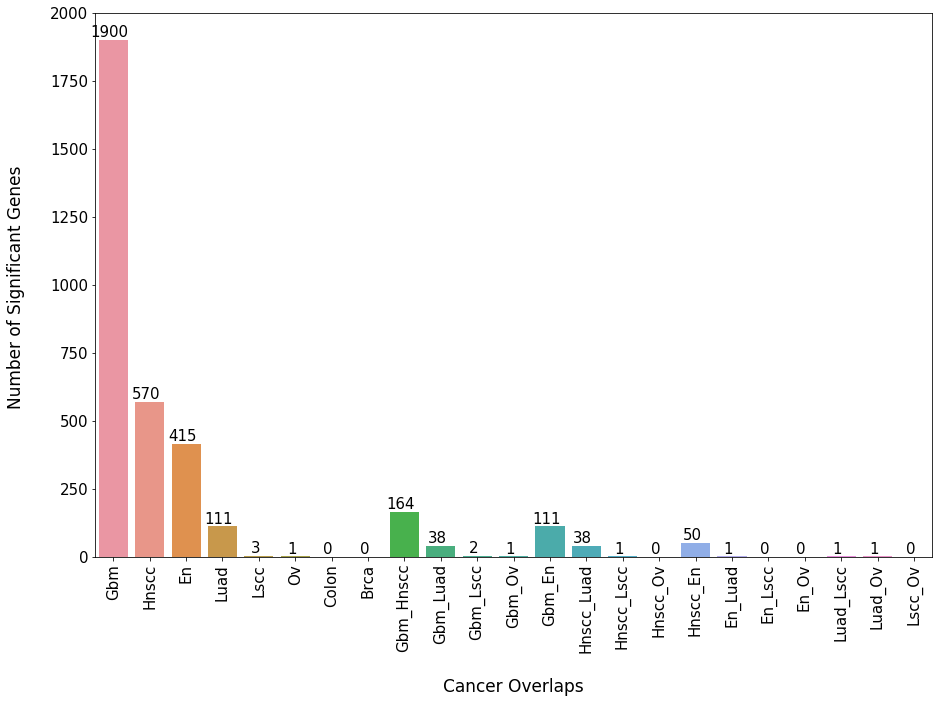

In [7]:
#a4_dims = (11, 6) #dimensions for bigger plot
#fig, ax = plt.subplots(figsize=a4_dims)
plt.figure(figsize=(15,10))
o = sns.barplot(x=both['cancer'], y=both['sig_genes'], data=both)#, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None,
plt.setp(o.get_xticklabels(),rotation=90)

for p in o.patches:
    o.annotate('{:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 15)


o.set_xlabel('\nCancer Overlaps', size = 17)
o.set_ylabel('Number of Significant Genes \n', size = 17)
o.xaxis.set_tick_params(labelsize=15)
o.yaxis.set_tick_params(labelsize=15)
plt.ylim(0, 2000)

plt.show()

In [8]:
# Check
all_df.loc[all_df['Proteomics'] == 'MMS19']

,Proteomics,P_Value,Medians,Cancer
66,MMS19,0.000629,-0.324287,Gbm
12471,MMS19,0.145010,-0.123084,Hnscc
22365,MMS19,0.027361,-0.620000,Luad
33043,MMS19,0.366903,-0.356650,Lscc
45093,MMS19,0.403055,-0.653400,Brca
54708,MMS19,0.000110,-0.324897,Ov
69516,MMS19,0.519462,-0.084700,En
76038,MMS19,0.624087,-0.121800,Colon


In [9]:
# Get dictionary with lists of genes sig in two cancers
three = {}
c2_list = ['Gbm', 'Hnscc', 'Luad', 'Lscc', 'Ov', 'En']
c3_list = ['Hnscc', 'Luad', 'Lscc', 'Ov', 'En']
for c1 in sig_one_cancer:
    c2_list.remove(c1)
    for c2 in c2_list:
        c3_list.remove(c2)
        for c3 in c3_list:
            #print(c1, c2, '\n')
            c1_genes = sig_one_cancer[c1]
            c2_genes = sig_one_cancer[c2]
            c3_genes = sig_one_cancer[c3]
            in_all = list(set(c1_genes) & set(c2_genes) & set(c3_genes))
            three[c1+'_'+c2+'_'+c3] = in_all
            print(c1+'_'+c2+'_'+c3, len(in_all))
        
three

Gbm_Hnscc_Luad 14
Gbm_Hnscc_Lscc 1
Gbm_Hnscc_Ov 0
Gbm_Hnscc_En 21
Gbm_Luad_Lscc 0
Gbm_Luad_Ov 1
Gbm_Luad_En 1
Gbm_Lscc_Ov 0
Gbm_Lscc_En 0
Gbm_Ov_En 0


ValueError: list.remove(x): x not in list

# Get a list of significant genes in multiple cancers

In [ ]:
# sig in multiple (more than 1) cancers
mult = list(set(i for i in flat_list if flat_list.count(i) > 1)) # Keep genes sig in more than 1 cancer
print('Number of significant in mult cancers:', len(mult))

# dumbbell

In [ ]:
both = both.loc[both['sig_genes'] > 0]

In [ ]:
#a4_dims = (11, 6) #dimensions for bigger plot
#fig, ax = plt.subplots(figsize=a4_dims)
plt.figure(figsize=(15,10))
o = sns.barplot(x=both['cancer'], y=both['sig_genes'], data=both)#, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None,
plt.setp(o.get_xticklabels(),rotation=90)

for p in o.patches:
    o.annotate('{:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 15)


o.set_xlabel('\nCancer Overlaps', size = 17)
o.set_ylabel('Number of Significant Genes \n', size = 17)
o.xaxis.set_tick_params(labelsize=15)
o.yaxis.set_tick_params(labelsize=15)
plt.ylim(0, 2000)

plt.show()

In [ ]:
both.values[0]

# 'Gbm': 5, 'Hnscc': 4, 'En': 3, 'Luad': 2, 'Lscc': 1, 'Ov': 0

y1 = {'Gbm': 5, 'Hnscc': 4, 'En': 3, 'Luad': 2, 'Lscc': 1, 'Ov': 0, 
        'Gbm_Hnscc': 5, 'Gbm_Luad': 5, 'Gbm_Lscc': 5, 'Gbm_Ov': 5, 'Gbm_En': 5, 
        'Hnscc_Luad': 4, 'Hnscc_Lscc': 4, 'Hnscc_En': 4, 
        'En_Luad': 3, 'Luad_Lscc': 2, 'Luad_Ov': 2}

y2= {'Gbm': 5, 'Hnscc': 4, 'En': 3, 'Luad': 2, 'Lscc': 1, 'Ov': 0,
        'Gbm_Hnscc': 4, 'Gbm_Luad': 2, 'Gbm_Lscc': 1, 'Gbm_Ov': 0, 'Gbm_En': 3, 
        'Hnscc_Luad': 2, 'Hnscc_Lscc': 1, 'Hnscc_En': 3, 
        'En_Luad': 2, 'Luad_Lscc': 1, 'Luad_Ov': 0}

y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
ordered_df = y1_df.join(y2_df)
ordered_df

In [ ]:
# Create histogram

plt.figure(figsize=(15,10))
o = sns.barplot(x=both['cancer'], y=both['sig_genes'], data=both)#, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None,
plt.setp(o.get_xticklabels(),rotation=90)

# Add count of sig genes above each bar
for p in o.patches:
    o.annotate('{:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 15)


o.set_xlabel('', size = 15)
o.set_ylabel('Number of Significant Genes', size = 17)
o.get_xaxis().set_visible(False)
#o.xaxis.set_tick_params(labelsize=15)
o.yaxis.set_tick_params(labelsize=15)
plt.ylim(0, 2000)


# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 15})
d = plt.figure(figsize=(15,5))
my_range=range(1,len(ordered_df.index)+1) #range count for x axis num
d = plt.vlines(x=my_range, ymin=ordered_df['y1'], ymax=ordered_df['y2'], color='grey', alpha=0.4)
d = plt.scatter(my_range, ordered_df['y1'], color='navy', alpha=1) #plots first point
d = plt.scatter(my_range, ordered_df['y2'], color='navy', alpha=0.8) # plots second point

# Add title and axis names
labels = list(ordered_df.index[:6])
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,6), labels) # single cancer names
plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')


In [ ]:
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for i, area in zip(df.index, both["cancer"]):
    print(area)

    # extract the data for each area
    start_data = df[df["Area"] == area]["sig_genes"].values[0]
    print(start_data)
    '''
    finish_data = df[df["cancer"] == area]["sig_genes"].values[0]
    
    # plot the starting and ending plots
    ax.scatter(start_data, i, c = "blue", alpha = .8)
    ax.scatter(finish_data, i, c = "blue", alpha = .2)
    
    # connect them with an horizontal line
    ax.hlines(i, start_data, finish_data, color = "blue", alpha = .2)'''
    

In [ ]:
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set x and y label
ax.set_xlabel("Pct change")
ax.set_ylabel("Mean GDP per Capita")

# set the title
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014")

# add grid lines for the x axis to better separate the data
ax.grid(axis = "x")

# change the x limit programatically
x_lim = ax.get_xlim()
ax.set_xlim(x_lim[0]*.5, x_lim[1]*1.1)

# change the x ticks to be rounded pct %
x_ticks = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(round(tick*100, 0)) for tick in x_ticks]);